<h1 style="direction: rtl"> תרגול 2 חלק 2: מתיחה והזזה של פונקציות, טורי טיילור </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div style="direction: rtl"> אפשר למצוא עוד (המון) מידע בחלק השני של פרק 3 בספר: PRIMER 1
Functions and Approximations </div>

## <div style='direction: rtl'> הזזות ומתיחות של פונקציות </div> ##

 <div style='direction: rtl'> יש לנו פונקציה </div>

$$ y = f\left(x\right)$$

<div style='direction: rtl'>בשביל להזיז את הפונקציה למעלה ב-a</div>

$$ f_\text{move up by a}\left(x\right) = f(x)+a $$

<div style='direction: rtl'> בשביל למתוח את הפונקציה בפקטור של b</div>

$$ f_\text{scale y by b}\left(x\right) = b f(x) $$

<div style='direction: rtl'> ביחד: </div>

$$ f_\text{stretched \& moved}(x) = b f(x) + a $$


<div style='direction: rtl'> אם נזיז הכל לצד השני, נראה שאפשר לראות הזזה ומתיחה של הפונקציה כשינוי של משתנה ה-y </div>

$$  \frac{y-a}{b} = f(x) $$

<div style='direction: rtl'>
    בשביל להזיז את הפונקציה בציר האופקי, צריך לעשות הזזה ומתיחה על ציר הx:
</div>
<div style='direction: rtl'>
    הזזה
</div>  

$$ f_\text{move right +c in x}\left(x\right) = f(x-c) $$  

<div style='direction: rtl'>מתיחה
</div>  

$$ f_\text{scale x by factor d}\left(x\right) = f(\frac{x}{d}) $$  

<div style='direction: rtl'>ביחד
</div>  

$$ f_\text{stretched \& moved}(x) = f(\frac{x-c}{d})$$  


<div style='direction: rtl'> יש סמטריה בין הזזה ומתיחה ב-x והזזה ומתיחה ב-y</div>

$$ \frac{y-a}{b} = f\left( \frac{x-c}{d}\right) $$

<div style="direction: rtl">במקור ניסיתי לעשות את זה בתוך המחברת, אבל אני מוצא שוב ושוב שdesmos הוא דרך יותר קלה לעשות דברים <a href="https://www.desmos.com/calculator/apys0pgv00">אינטראקטיבים</a></div>

---

<div dir="rtl"> שימוש מאוד חשוב להזזה ומתיחה זה במעברי יחידות.<br> למשל, קיבלנו תמונה של קו רקיע של רחוב</div>

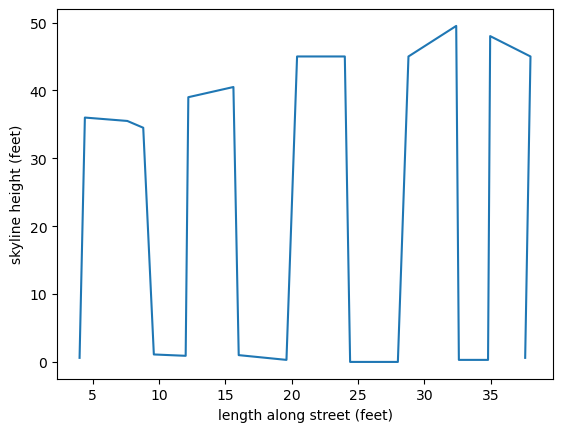

In [60]:
height_of_skyline = np.array([ 0.6, 36. , 35.5, 34.5,  1.1,
                               0.9, 39. , 40.5,  1.0,
                               0.3, 45. , 45. ,  0. ,
                               0. , 45. , 49.5,  0.3,
                               0.3, 48. , 45. ,  0.6])

x_of_street = np.array([ 4.  ,  4.4 ,  7.6 ,  8.8 ,  9.6 ,
                        12.  , 12.2 , 15.6 , 16.  ,
                        19.6 , 20.4 , 24.  , 24.4 ,
                        28.  , 28.8 , 32.4 , 32.6 ,
                        34.8 , 34.96, 38.  , 37.6 ])
plt.plot(x_of_street,height_of_skyline)
plt.xlabel('length along street (feet)')
plt.ylabel('skyline height (feet)')
plt.show()

<div dir="rtl"> אם אנחנו רוצים לעבור מיחידות של רגל למטר, אנחנו צריכים לכווץ את המרחקים </div>

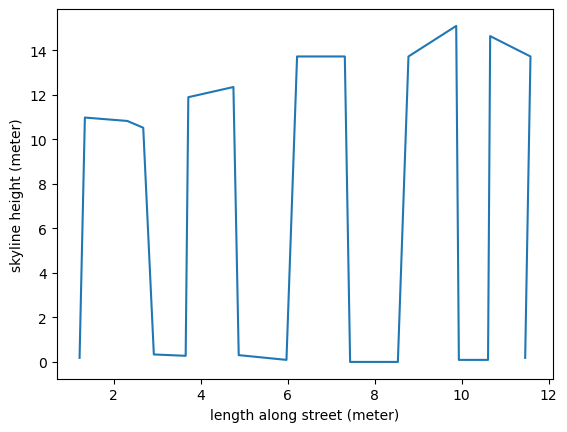

In [71]:
feet_in_meter = 3.280
plt.plot(x_of_street/feet_in_meter,height_of_skyline/feet_in_meter)
plt.xlabel('length along street (meter)')
plt.ylabel('skyline height (meter)')
plt.show()

<div dir="rtl"> נניח שיש לי דירה ברחוב ממול, ואני רוצה לשרטט מה אני רואה מהחלון שלי:<br> יש לי את המיקום של הדירה, ויש לי את הגבול של כמה אני רואה מהחלון ב-x וב-y. נרצה לעשות הזזה בשביל למרכז את התמונה איפה שהדירה שלי </div>

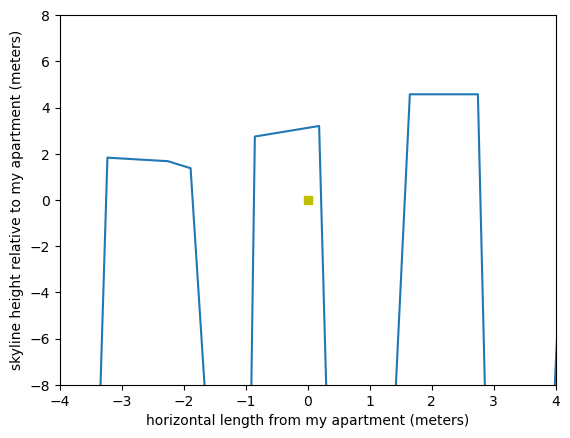

In [72]:
plt.plot(0,0,linestyle=None,marker='s',color='y')

my_apartment_x = 15 # in feet
my_apartment_window_xlim = (-4,4) # in reality, an obtuse calculation

my_apartment_y = 30
my_apartment_window_ylim = (-8,8)

plt.plot((x_of_street-my_apartment_x)/3.280,
         (height_of_skyline-my_apartment_y)/3.280)
plt.xlabel('horizontal length from my apartment (meters)')
plt.ylabel('skyline height relative to my apartment (meters)')
plt.xlim(my_apartment_window_xlim)
plt.ylim(my_apartment_window_ylim)
plt.show()

### <div style='direction: rtl'>שאלה 1: הזזה ומתיחה של פונקציות </div> ###

<div style="direction: rtl">
    <code>rng.uniform(a,b)</code> מגריל מספר בתחום $\lbrack a, b)$. אפשר לראות את זה כהזזה ומתיחה של <code>rng.random</code> שבתחום $\lbrack0,1)$.<br>
    א. השתמש בהזזה ומתיחה בשביל להגיע מההתפלגות של <code>random</code> להתפלגות של <code>uniform(-1,3)</code>. הראה שההתפלגויות זהות.<br>
    ב. נשווה בין ההתפלגות <code>random</code> להתפלגות החדשה לפי פונקצית צפיפות ההתפלגות (<code>hist(density=True)</code>): אילו הזזות ומתיחות קרו לפונקציה?
</div>

In [2]:
rng=np.random.default_rng(444)
rng.random(), rng.uniform(-1,3)

(0.8242540938518786, -0.54464379831311)

In [3]:
# your code here

####  <div style="direction: rtl"> תשובה (ספוילר) </div>

<div style="direction: rtl"> א. </div>

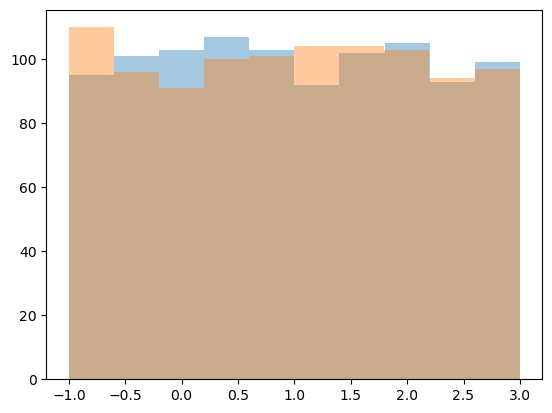

In [4]:
rng=np.random.default_rng(72362)
x_random = rng.random(1000)
x_uniform_from_random = (3--1)*x_random-(3+-1)/2
x_uniform = rng.uniform(-1,3,1000)
plt.hist(x_uniform_from_random,alpha=0.4)
plt.hist(x_uniform,alpha=0.4)
plt.show()

<div style="direction: rtl"> ב. </div>

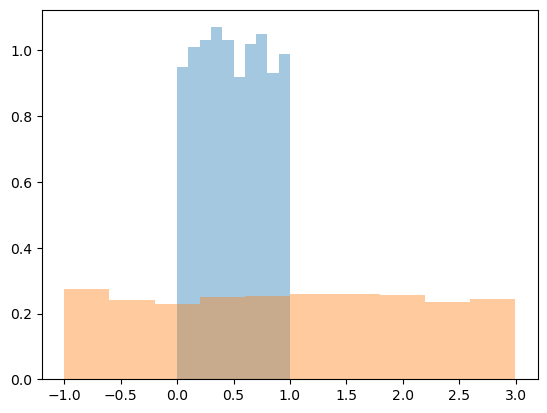

In [5]:
plt.hist(x_random,alpha=0.4,density=True)
plt.hist(x_uniform,alpha=0.4,density=True)
plt.show()

<div style="direction: rtl"> הפונקציה הוזזה ונמתחה בציר ה-x, אבל היא גם נדחסה בציר ה-y</div>

## <div style='direction: rtl'> טורי טיילור </div> ##

<div style='direction: rtl'>
    עבור פונקציה $f\left(x\right)$, טור טיילור הוא דרך להביע פונקציה בעזרת הנגזרות של הפונקציה $f^{\left(n\right)}=\frac{d^nf}{dx^n}$ וחזקות של $x$
</div>

$$ f\left(x\right) = \sum_{n=0}^\infty \frac{f^{(n)}\left(0\right)}{n!}x^n $$  

<div style='direction: rtl'>
    -כש-x יותר קרוב ל-0, החזקות של x נהיות יותר ויותר קטנות.
    </div>

| power | 0|1 |2 |3 | 4 |
| :-: | :-: | :-: | :-: | :-: | :-: |
|x=0.9 |1| 0.9| 0.81 |0.729 | 0.6561 |
|x=0.5 |1| 0.5| 0.25 |0.125 | 0.0625 |
|x=0.1 |1| 0.1| 0.01 |0.001 | 0.0001 |

<div style='direction: rtl'>
    המשמעות היא שקרוב ל-0, אפשר לזרוק את כל האיברים עם חזקות גדולות ועדיין לקבל קירוב טוב
</div>

$$ f\left(x\right)= f\left(0\right) + f^\prime\left(0\right) x + \ldots $$

$$ f\left(x\right) \approx a + bx $$

<div style='direction: rtl'>
    למשל, לפונקציה $f\left(x\right) = e^x$
</div>

$$ e^x = 1+x+\frac{1}{2}x^2 + \frac{1}{6}x^3 + \ldots \approx 1+x  \quad \text{when}\; x\sim 0$$

<div style='direction: rtl'> נצייר את הפונקציה והקירוב</div>

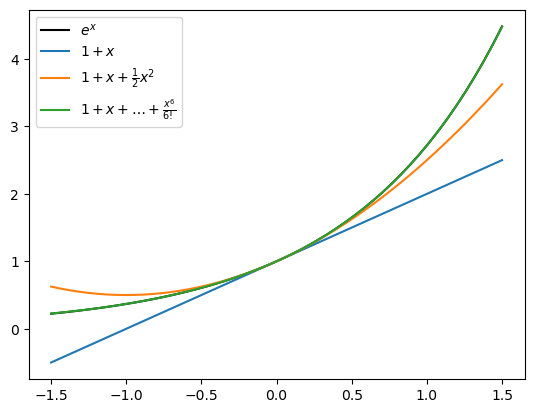

In [6]:
x = np.linspace(-1.5,1.5,50)
y_exact = np.exp(x)
y_approx = 1 + x
y_approx2 = 1+x+0.5*x**2
y_approx_n = lambda n: sum(x**n/np.math.factorial(n) for n in range(n+1))
plt.plot(x, y_exact, color='black', label=r'$ e^x $')
plt.plot(x, y_approx, label=r'$ 1+x $')
plt.plot(x, y_approx2, label=r'$ 1+x +\frac{1}{2}x^2$')
plt.plot(x, y_approx_n(6), label=r'$ 1+x+ \ldots + \frac{x^{6}}{6!}$')
plt.legend()
plt.show()

<div style="direction: rtl">
   בשביל לקרב סביב נקודה שהיא לא אפס, נבצע הזזה: נגדיר פונקציה חדשה שהיא 0 סביב הנקודה שאנחנו רוצים
</div>

$$ g\left(0\right) = f\left(x_0\right) \longrightarrow g\left(x-x_0\right) = f\left(x\right) $$

<div style="direction: rtl">
    נפתח בטור טיילור:
</div>

$$ g\left(x\right) = \sum_{n=0}^\infty \frac{g^{(n)}\left(0\right)}{n!}x^n $$  

$$ g\left(x-x_0\right)= \sum \frac{g^{(n)}\left(0\right)}{n!}\left(x-x_0\right)^n$$

<div style="direction: rtl">
    ונחזור ל-$f$:
</div>

$$ f\left(x\right) =  \sum\frac{f^{(n)}\left(x_0\right)}{n!}\left(x-x_0\right)^n = \sum\frac{f^{(n)}\left(x_0\right)}{n!}\left(\delta x\right)^n $$

<div style="direction: rtl">
    במודלים ביולוגים, זה אומר שכשמסתכלים על התנהגות קרוב לנקודה ידועה רוב המודלים יהיו מאוד פשוטים!<br>
    <ul>
        <li> RNA מתפרק מחוץ לגוף בצורה מעריכית $f(t)=\exp\left(-\kappa t\right)$ בזמן של כמה שבועות.<br> בזמן של כמה שעות על השולחן, אפשר לקרב ל- $f(t)=1-kt$ </li><br>
        <li> מודל השקיה (פיקטיבי) הוא $yield(water)=\frac{\sqrt{w}}{1+w^2}$ <br>בהשקייה סביב הכמות $w\approx \frac{1}{4}$ היבול כפונקציה של ההשקיה הוא בקירוב $y(\frac{1}{4}+\delta w)\approx 0.47 + 0.72\delta w $ 
        </li><br>

   </ul>

</div>

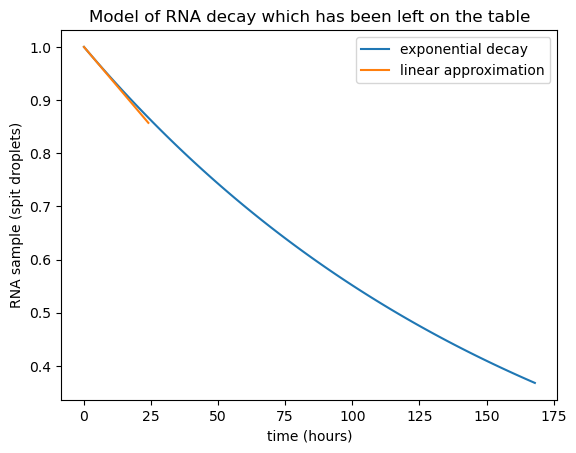

In [7]:
week = 7*24
t = np.linspace(0,week,100)
t_small = np.linspace(0,24)
k = 1/week

plt.plot(t,np.exp(-k*t),label='exponential decay')
plt.plot(t_small, 1-k*t_small,label='linear approximation')
plt.legend()
plt.title("Model of RNA decay which has been left on the table")
plt.xlabel('time (hours)')
plt.ylabel('RNA sample (spit droplets)')
plt.show()

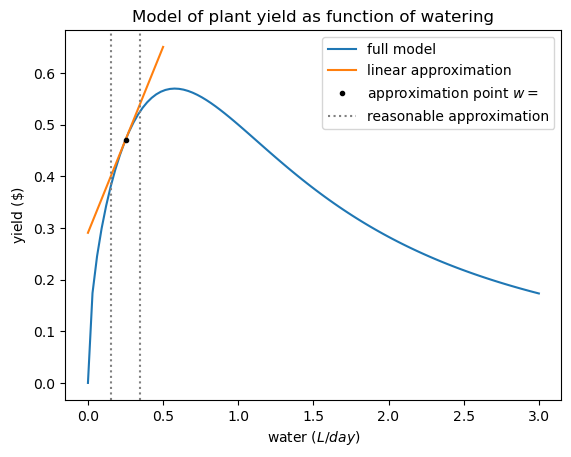

In [8]:
x=np.linspace(0,3,100)
yield_w = lambda x: (x**0.5)/(1+x**2)
dyield_dw = lambda x: (1/(2*(1+x**2)*x**0.5 ) - 2*x**1.5/(1+x**2)**2)
wm = 0.25
yield_linear = lambda x: yield_w(wm)+dyield_dw(wm)*(x-wm)
x_small = np.linspace(0,0.5)
plt.plot(x,yield_w(x), label='full model')
plt.plot(x_small, yield_linear(x_small), label='linear approximation')
plt.plot(wm, yield_w(wm),'.k',label='approximation point $w=\frac{1}{4}$')
plt.axvline(1.25/8,linestyle=':',color='grey')
plt.axvline(2.75/8,linestyle=':',color='grey',label='reasonable approximation')
plt.legend()
plt.title('Model of plant yield as function of watering')
plt.xlabel('water ($L/day$)')
plt.ylabel('yield ($\$$)')
plt.show()